<h1><p style="text-align: center;">Data Analysis with Python <br>Project - 1</p><h1> - Traffic Police Stops <img src="https://docs.google.com/uc?id=17CPCwi3_VvzcS87TOsh4_U8eExOhL6Ki" class="img-fluid" alt="CLRSWY" width="200" height="100"> 

In this chapter, you will use a **second dataset** to explore the impact of **weather conditions** on police behavior during traffic stops. You will practice **merging** and **reshaping** datasets, assessing whether a data source is trustworthy, working with **categorical** data, and other advanced skills.

## Plotting the temperature

In this exercise, you'll examine the ``temperature`` columns from the ``weather`` dataset to assess whether the data seems trustworthy. First you'll print the summary statistics, and then you'll visualize the data using a **box plot**.

When deciding whether the values seem reasonable, keep in mind that the temperature is measured in degrees **Fahrenheit**, not Celsius!

**INSTRUCTIONS**

*   Read ``weather.csv`` into a ``DataFrame`` named ``weather``.
*   Select the temperature columns (``TMIN``, ``TAVG``, ``TMAX``) and print their ``summary statistics`` using the ``.describe()`` method.
*   Create a **box plot** to visualize the temperature columns.
*   Display the plot.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def prc(x):return round(x*100,1)            # yüzde (%) gösteriminde kolaylık için
def celcius(x): return   (x - 32) / 1.8     # fahrenheit i celcius a çevirir

we=pd.read_csv("weather.csv")
we.head()

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
we.shape

(8022, 26)

In [3]:
we.isnull().sum()

STATION       0
DATE          0
AWND       4005
TAVG       6805
TMAX         17
TMIN         26
WT01       6245
WT02       7801
WT03       7795
WT04       7903
WT05       7662
WT06       7997
WT07       7943
WT08       7618
WT09       7953
WT10       8020
WT11       8019
WT13       6847
WT14       7447
WT15       8016
WT16       6696
WT17       8010
WT18       7677
WT19       8018
WT21       8004
WT22       7990
dtype: int64

In [4]:
 round(we[["TMIN", "TAVG", "TMAX"]].describe(),1)

,TMIN,TAVG,TMAX
count,7996.0,1217.0,8005.0
mean,42.1,52.5,61.2
std,17.4,17.8,18.5
min,-10.0,6.0,13.0
25%,29.0,39.0,46.0
50%,42.0,54.0,62.0
75%,57.0,68.0,77.0
max,77.0,86.0,102.0


<AxesSubplot:>

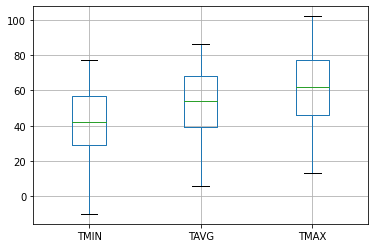

In [5]:
we[["TMIN", "TAVG", "TMAX"]].plot.box(grid=True)

In [6]:
# Görselleştirmeyi alışkın olduğumuz Celcius sıcaklık birimine dönüştürelim

In [7]:
we[["CTMIN", "CTAVG", "CTMAX"]]=celcius(we[["TMIN", "TAVG", "TMAX"]])

In [8]:
 round(we[["CTMIN", "CTAVG", "CTMAX"]].describe())

,CTMIN,CTAVG,CTMAX
count,7996.0,1217.0,8005.0
mean,6.0,11.0,16.0
std,10.0,10.0,10.0
min,-23.0,-14.0,-11.0
25%,-2.0,4.0,8.0
50%,6.0,12.0,17.0
75%,14.0,20.0,25.0
max,25.0,30.0,39.0


<AxesSubplot:>

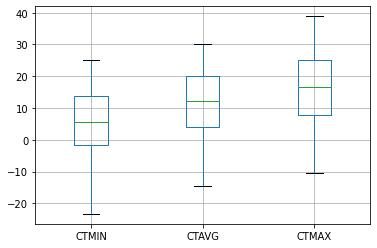

In [9]:
we[["CTMIN", "CTAVG", "CTMAX"]].plot.box(grid=True)

***

## Plotting the temperature difference

**INSTRUCTIONS**

*   Create a new column in the ``weather`` ``DataFrame`` named ``TDIFF`` that represents the difference between the maximum and minimum temperatures.
*   Print the summary statistics for ``TDIFF`` using the ``.describe()`` method.
*   Create a histogram with ``20 bins`` to visualize ``TDIFF``.
*   Display the plot.

In [10]:
we["TDIFF"]=we.TMAX-we.TMIN

In [11]:
we.head()

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT16,WT17,WT18,WT19,WT21,WT22,CTMIN,CTAVG,CTMAX,TDIFF
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-2.222222,NaN,8.333333,19.0
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-4.444444,NaN,11.111111,28.0
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-2.777778,NaN,8.888889,21.0
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.444444,NaN,12.222222,14.0
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.555556,NaN,6.666667,13.0


In [12]:
we.TDIFF.dtypes

dtype('float64')

In [13]:
round(we.TDIFF.describe(),1)

count    7994.0
mean       19.1
std         7.0
min       -25.0
25%        14.0
50%        19.0
75%        24.0
max        48.0
Name: TDIFF, dtype: float64

<AxesSubplot:ylabel='Frequency'>

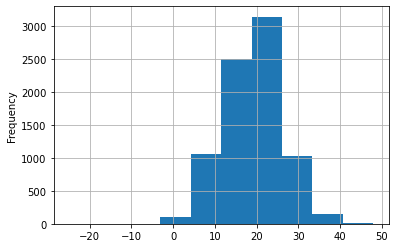

In [14]:
we.TDIFF.plot.hist(20, grid=True)

***

## Counting bad weather conditions

The ``weather`` ``DataFrame`` contains ``20`` columns that start with ``'WT'``, each of which represents a bad weather condition. For example:

*   ``WT05`` indicates ``"Hail"``
*   ``WT11`` indicates ``"High or damaging winds"``
*   ``WT17`` indicates ``"Freezing rain"``

For every row in the dataset, each ``WT`` column contains either a ``1`` (meaning the condition was present that day) or ``NaN`` (meaning the condition was not present).

In this exercise, you'll quantify ``"how bad"`` the weather was each day by counting the number of ``1`` values in each row.

**INSTRUCTIONS**

*   Copy the columns ``WT01`` through ``WT22`` from ``weather`` to a new ``DataFrame`` named ``WT``.
*   Calculate the sum of each row in ``WT``, and store the results in a new weather column named ``bad_conditions``.
*   Replace any ``missing values`` in ``bad_conditions`` with a ``0``. (This has been done for you.)
*   Create a **histogram** to visualize ``bad_conditions``, and then display the plot.

In [15]:
wt=we.iloc[:,6:26]
wt.head()

,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
we["bad_conditions"]=wt.sum(axis=1)
we.head()

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT17,WT18,WT19,WT21,WT22,CTMIN,CTAVG,CTMAX,TDIFF,bad_conditions
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-2.222222,NaN,8.333333,19.0,0.0
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-4.444444,NaN,11.111111,28.0,0.0
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-2.777778,NaN,8.888889,21.0,0.0
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.444444,NaN,12.222222,14.0,0.0
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.555556,NaN,6.666667,13.0,0.0


<AxesSubplot:ylabel='Frequency'>

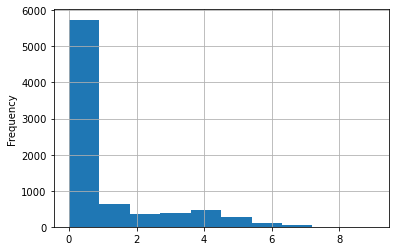

In [17]:
we.bad_conditions.plot.hist(20, grid=True)

***

## Rating the weather conditions

In the previous exercise, you counted the number of bad weather conditions each day. In this exercise, you'll use the counts to create a *rating system** for the weather.

The counts range from ``0`` to ``9``, and should be converted to ratings as follows:

*   Convert ``0`` to ``'good'``
*   Convert ``1`` through ``4`` to ``'bad'``
*   Convert ``5`` through ``9`` to ``'worse'``

**INSTRUCTIONS**

*   Count the **unique** values in the ``bad_conditions`` column and sort the ``index``. 
*   Create a ``dictionary`` called ``mapping`` that maps the ``bad_conditions`` integers to strings as specified above.
*   Convert the ``bad_conditions`` integers to strings using the ``mapping`` and store the results in a new column called ``rating``.
*   Count the **unique** values in ``rating`` to verify that the integers were properly converted to strings.

In [18]:
we.bad_conditions.sum()

6779.0

In [19]:
we.bad_conditions.value_counts()

0.0    5738
1.0     628
4.0     476
3.0     380
2.0     368
5.0     282
6.0     101
7.0      41
9.0       4
8.0       4
Name: bad_conditions, dtype: int64

In [20]:
we.groupby("STATION").bad_conditions.value_counts()

STATION      bad_conditions
USC00371874  1.0                  7
             2.0                  1
USC00371875  1.0                  6
USC00379423  0.0               3989
             1.0                  2
USW00014765  0.0               1749
             1.0                613
             4.0                476
             3.0                380
             2.0                367
             5.0                282
             6.0                101
             7.0                 41
             8.0                  4
             9.0                  4
Name: bad_conditions, dtype: int64

In [21]:
we.STATION.value_counts()

USW00014765    4017
USC00379423    3991
USC00371874       8
USC00371875       6
Name: STATION, dtype: int64

In [22]:
we.bad_conditions.value_counts().sort_index()

0.0    5738
1.0     628
2.0     368
3.0     380
4.0     476
5.0     282
6.0     101
7.0      41
8.0       4
9.0       4
Name: bad_conditions, dtype: int64

In [23]:
mapping={0:"good",1:"bad",2:"bad",3:"bad",4:"bad",5:"worse",6:"worse",7:"worse",8:"worse",9:"worse"}

In [24]:
we["rating"]=we.bad_conditions.map(mapping)
we.rating.unique()

array(['good', 'bad', 'worse'], dtype=object)

In [25]:
we.head()

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT18,WT19,WT21,WT22,CTMIN,CTAVG,CTMAX,TDIFF,bad_conditions,rating
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-2.222222,NaN,8.333333,19.0,0.0,good
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-4.444444,NaN,11.111111,28.0,0.0,good
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-2.777778,NaN,8.888889,21.0,0.0,good
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.444444,NaN,12.222222,14.0,0.0,good
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.555556,NaN,6.666667,13.0,0.0,good


***

## Changing the data type to category

Since the ``rating`` column only has a few possible values, you'll change its data type to ``category`` in order to store the data more efficiently. You'll also specify a logical order for the categories, which will be useful for future exercises.

**INSTRUCTIONS**

*   Create a ``list`` object called ``cats`` that lists the weather ratings in a logical order: ``'good'``, ``'bad'``, ``'worse'``.
*   Change the data type of the ``rating`` column from ``object`` to ``category``. Make sure to use the ``cats list`` to define the category ordering.
*   Examine the ``head`` of the ``rating`` column to confirm that the categories are logically ordered.

In [26]:
cats=("good","bad","worse")

In [27]:
cat_dtype = pd.api.types.CategoricalDtype(categories=cats, ordered=True)
we.rating=we.rating.astype(cat_dtype)

In [28]:
we.rating.head()

0    good
1    good
2    good
3    good
4    good
Name: rating, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']

***

## Preparing the DataFrames

In this exercise, you'll prepare the **traffic stop** and **weather rating** ``DataFrames`` so that they're ready to be merged:

With the ``ri`` ``DataFrame``, you'll move the ``stop_datetime`` index to a ``column`` since the index will be lost during the merge.

With the ``weather`` ``DataFrame``, you'll select the ``DATE`` and ``rating`` columns and put them in a new ``DataFrame``.

**INSTRUCTIONS**

* Reset the ``index`` of the ``ri`` ``DataFrame``.

* Examine the ``head`` of ``ri`` to verify that ``stop_datetime`` is now a ``DataFrame`` column, 
and the ``index`` is now the default ``integer`` index.

* Create a new ``DataFrame`` named ``weather_rating`` that contains only the ``DATE`` and ``rating`` columns from the ``weather`` ``DataFrame``.

* Examine the ``head`` of ``weather_rating`` to verify that it contains the proper columns.

> Before starting your work from this part of this chapter **repeat the steps which you did in the first chapter for preparing the ``ri`` data.** Continue to this chapter based on where you were in the end of the first chapter.

In [29]:
weather_rating=we[we.STATION=="USW00014765"][["DATE","rating"]]
weather_rating

,DATE,rating
4005,2005-01-01,bad
4006,2005-01-02,bad
4007,2005-01-03,bad
4008,2005-01-04,bad
4009,2005-01-05,bad
...,...,...
8017,2015-12-27,bad
8018,2015-12-28,good
8019,2015-12-29,bad
8020,2015-12-30,bad


In [30]:
ri=pd.read_csv("police_3.csv")
ri.head()

C:\Users\C\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,stop_datetime,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,...,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,frisk,stop_minutes
0,2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,...,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,False,8
1,2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,...,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,False,23
2,2005-01-04 12:55:00,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,...,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,False,8
3,2005-01-06 01:30:00,RI-2005-00005,2005-01-06,01:30,Zone X4,500,M,1978.0,27.0,B,...,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,False,8
4,2005-01-12 08:05:00,RI-2005-00006,2005-01-12,08:05,Zone X1,0,M,1973.0,32.0,B,...,NaN,False,Citation,False,30+ Min,True,False,Zone X1,False,45


***

## Merging the DataFrames

Merging the DataFrames
In this exercise, you'll ``merge`` the ``ri`` and ``weather_rating`` ``DataFrames`` into a new ``DataFrame``, ``ri_weather``.

The ``DataFrames`` will be joined using the ``stop_date`` column from ``ri`` and the ``DATE`` column from ``weather_rating``. Thankfully the date formatting matches exactly, which is not always the case!

Once the merge is complete, you'll set ``stop_datetime`` as the index, which is the column you saved in the previous exercise.

**INSTRUCTIONS**
- Examine the shape of the ``ri`` ``DataFrame``.
``Merge`` the ``ri`` and ``weather_rating`` ``DataFrames`` using a ``left join``.
- Examine the ``shape`` of ``ri_weather`` to confirm that it has two more columns but the same number of rows as ``ri``.
- Replace the ``index`` of ``ri_weather`` with the ``stop_datetime`` column.

In [31]:
ri.shape

(480584, 25)

In [32]:
weather_rating.shape

(4017, 2)

In [33]:
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left').drop_duplicates()

In [34]:
ri_weather.shape

(480584, 27)

In [35]:
ri_weather=ri_weather.drop_duplicates()
ri_weather.shape

(480584, 27)

In [36]:
ri_weather.head()

,stop_datetime,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,...,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,frisk,stop_minutes,DATE,rating
0,2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,...,Citation,False,0-15 Min,False,False,Zone K1,False,8,2005-01-02,bad
1,2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,...,Citation,False,16-30 Min,False,False,Zone X4,False,23,2005-01-02,bad
2,2005-01-04 12:55:00,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,...,Citation,False,0-15 Min,False,False,Zone X4,False,8,2005-01-04,bad
3,2005-01-06 01:30:00,RI-2005-00005,2005-01-06,01:30,Zone X4,500,M,1978.0,27.0,B,...,Citation,False,0-15 Min,False,False,Zone X4,False,8,2005-01-06,worse
4,2005-01-12 08:05:00,RI-2005-00006,2005-01-12,08:05,Zone X1,0,M,1973.0,32.0,B,...,Citation,False,30+ Min,True,False,Zone X1,False,45,2005-01-12,worse


In [37]:
ri_weather.set_index("stop_datetime",inplace=True)
ri_weather.head()

,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,frisk,stop_minutes,DATE,rating
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,White,...,Citation,False,0-15 Min,False,False,Zone K1,False,8,2005-01-02,bad
2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,White,...,Citation,False,16-30 Min,False,False,Zone X4,False,23,2005-01-02,bad
2005-01-04 12:55:00,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,White,...,Citation,False,0-15 Min,False,False,Zone X4,False,8,2005-01-04,bad
2005-01-06 01:30:00,RI-2005-00005,2005-01-06,01:30,Zone X4,500,M,1978.0,27.0,B,Black,...,Citation,False,0-15 Min,False,False,Zone X4,False,8,2005-01-06,worse
2005-01-12 08:05:00,RI-2005-00006,2005-01-12,08:05,Zone X1,0,M,1973.0,32.0,B,Black,...,Citation,False,30+ Min,True,False,Zone X1,False,45,2005-01-12,worse


***

## Comparing arrest rates by weather rating

Do police officers arrest drivers more often when the weather is bad? Find out below!

**INSTRUCTIONS**
- **First**, you'll calculate the **overall arrest rate**.

- **Then**, you'll calculate the **arrest rate** for each of the **weather ratings** you previously assigned.

- **Finally**, you'll add **violation type** as a second factor in the analysis, to see if that accounts for any differences in the arrest rate.

Since you previously defined a logical order for the weather categories, ``good < bad < worse``, they will be sorted that way in the results.

In [38]:
prc(ri_weather.is_arrested.value_counts(normalize=True))


False    96.5
True      3.5
Name: is_arrested, dtype: float64

In [39]:
 ri_weather.is_arrested.mean()

0.03454755048024903

In [40]:
# (toplam tutuklama yüzdesi)",)

In [41]:
wri=pd.crosstab(ri_weather.rating, ri_weather.is_arrested)
wri

is_arrested,False,True
rating,,
good,214855,7333
bad,208806,7618
worse,40320,1652


In [42]:
wri["Arrested_Percent"]=prc(ri_weather.groupby("rating").is_arrested.mean())
wri

is_arrested,False,True,Arrested_Percent
rating,,,
good,214855,7333,3.3
bad,208806,7618,3.5
worse,40320,1652,3.9


In [43]:
prc(ri_weather.groupby("rating").is_arrested.mean().mean())

3.6

In [44]:
#  Hava durumu  kötüleştikçe tutukla oranları artıyor

In [45]:
# **Hava durum kaydı tüm günler için mevcut ** 
# ri_weather.rating.value_counts().sum()  = 480584

In [46]:
lll=prc(ri_weather.groupby(["violation","rating"]).is_arrested.mean())
lll

violation            rating
Equipment            good      5.6
                     bad       6.0
                     worse     9.4
Moving violation     good      5.6
                     bad       5.8
                     worse     6.2
Other                good      8.2
                     bad       8.5
                     worse     5.9
Registration/plates  good      7.7
                     bad       9.3
                     worse     9.9
Seat belt            good      2.6
                     bad       2.9
                     worse     0.0
Speeding             good      1.3
                     bad       1.3
                     worse     1.7
Name: is_arrested, dtype: float64

In [47]:
round(lll.mean(),1)

5.4

In [48]:
#  ihlal yapıldığı zamanlarda tutuklama yüzdesi, yüzde artıyor

***

## Selecting From a mult-indexed Series

The output of a single ``.groupby()`` operation on multiple columns is a ``Series`` with a ``MultiIndex``. Working with this type of object is similar to working with a ``DataFrame``:

The ``outer`` index level is like the ``DataFrame`` rows.
The ``inner`` index level is like the ``DataFrame`` columns.
In this exercise, you'll practice accessing data from a multi-indexed ``Series`` using the ``.loc[]`` accessor.

**INSTRUCTIONS**

- Save the output of the ``.groupby()`` operation from the last exercise as a new object, ``arrest_rate``.
- Print the ``arrest_rate`` ``Series`` and examine it.
- Print the arrest rate for ``moving violations`` in bad weather.
- Print the arrest rates for ``speeding violations`` in all three weather conditions.

In [49]:
arrest_rate = prc(ri_weather.groupby(['rating', 'violation']).is_arrested.mean())

In [50]:
arrest_rate

rating  violation          
good    Equipment              5.6
        Moving violation       5.6
        Other                  8.2
        Registration/plates    7.7
        Seat belt              2.6
        Speeding               1.3
bad     Equipment              6.0
        Moving violation       5.8
        Other                  8.5
        Registration/plates    9.3
        Seat belt              2.9
        Speeding               1.3
worse   Equipment              9.4
        Moving violation       6.2
        Other                  5.9
        Registration/plates    9.9
        Seat belt              0.0
        Speeding               1.7
Name: is_arrested, dtype: float64

In [51]:
#  kötü hava da "Moving violations" durumundaki yakalama oranı 

In [52]:
arrest_rate.loc["bad", "Moving violation"] 

5.8

In [53]:
# hız ihlali yapıldığı zamanlarda daki tutuklama oranları 

In [54]:
prc(ri_weather[ri_weather.violation=="Speeding"].is_arrested.mean())

1.4

***

## Reshaping the arrest rate data

In this exercise, you'll start by **reshaping** the ``arrest_rate`` ``Series`` into a ``DataFrame``. This is a useful step when working with any multi-indexed ``Series``, since it enables you to access the full range of ``DataFrame`` methods.

Then, you'll create the exact same ``DataFrame`` using a ``pivot table``. This is a great example of how pandas often gives you more than one way to reach the same result!

**INSTRUCTIONS**

- ``unstack`` the ``arrest_rate`` ``Series`` to ``reshape`` it into a ``DataFrame``.
- Create the exact same ``DataFrame`` using a ``pivot table``! Each of the three ``.pivot_table()`` parameters should be specified as one of the ``ri_weather`` columns.

In [55]:
arrest_rate.unstack()

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
rating,,,,,,
good,5.6,5.6,8.2,7.7,2.6,1.3
bad,6.0,5.8,8.5,9.3,2.9,1.3
worse,9.4,6.2,5.9,9.9,0.0,1.7


In [56]:
veri=pd.pivot_table(ri_weather,values='is_arrested', index='rating',columns='violation',
                    aggfunc=np.mean)
prc(veri)

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
rating,,,,,,
good,5.6,5.6,8.2,7.7,2.6,1.3
bad,6.0,5.8,8.5,9.3,2.9,1.3
worse,9.4,6.2,5.9,9.9,0.0,1.7


In [57]:
fg=prc(veri.transpose())
fg

rating,good,bad,worse
violation,,,
Equipment,5.6,6.0,9.4
Moving violation,5.6,5.8,6.2
Other,8.2,8.5,5.9
Registration/plates,7.7,9.3,9.9
Seat belt,2.6,2.9,0.0
Speeding,1.3,1.3,1.7


In [58]:
# Grafikle izleyelim

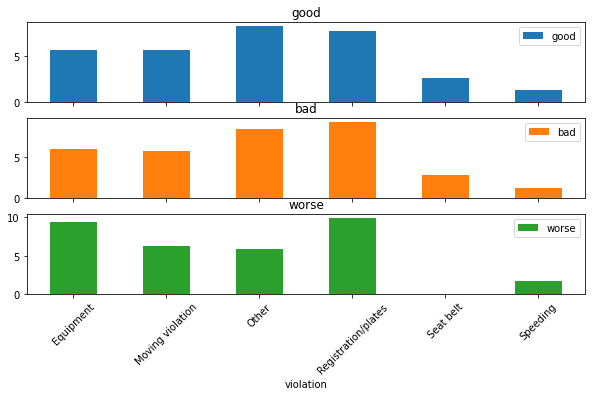

In [59]:
ff=fg.plot.bar( subplots=True,rot=45,figsize=(10,5))

In [60]:
# Hava durumu çok kötü "worse " olduğunda herkes kemerlerini takıyormuş :)

In [61]:
ri_weather.to_csv("ri_weather.csv")